# 2.2.2 Πυκνότητες Δικτύων Αναφορών Χρηστών

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy import stats
import numpy as np
import math

In [3]:
import os
import pickle
import glob
# fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
os.chdir(fildir)
GG= pickle.load( open( "GGm.p", "rb" ) )

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut mention network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1


The number 1 cut mention network has 23868 nodes and 22304 edges
The number 2 cut mention network has 2358 nodes and 2278 edges
The number 3 cut mention network has 720 nodes and 613 edges
The number 4 cut mention network has 351 nodes and 261 edges
The number 5 cut mention network has 206 nodes and 131 edges
The number 6 cut mention network has 113 nodes and 74 edges
The number 7 cut mention network has 78 nodes and 49 edges
The number 8 cut mention network has 50 nodes and 30 edges
The number 9 cut mention network has 37 nodes and 22 edges
The number 10 cut mention network has 28 nodes and 15 edges
The number 11 cut mention network has 23 nodes and 12 edges
The number 12 cut mention network has 19 nodes and 10 edges
The number 13 cut mention network has 16 nodes and 8 edges
The number 14 cut mention network has 12 nodes and 6 edges
The number 15 cut mention network has 10 nodes and 5 edges
The number 16 cut mention network has 8 nodes and 4 edges
The number 17 cut mention network has

In [4]:
ddg=[]
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [26]:
from __future__ import division
lsd=[]
for k,G in GG.items():
#     e=G.edges()
#     v=G.nodes()
#     e=len(e)
#     v=len(v)
    den=nx.density(G)
    lsd.append(den)
print lsd,len(lsd)

[3.9153347068040996e-05, 0.0004098739682529401, 0.001184129191778705, 0.0021245421245421245, 0.0031020601468150603, 0.005847029077117573, 0.008158508158508158, 0.012244897959183673, 0.1, 0.01984126984126984, 0.023715415019762844, 0.029239766081871343, 0.03333333333333333, 0.045454545454545456, 0.05555555555555555, 0.07142857142857142, 0.16666666666666666, 0.5, 0.016516516516516516] 19


In [42]:
lwden=[]
wden=0
for k,G in GG.items():
#     if :
    lt=[]
    for nd in G.edges(data=True):
        t=nd[2]['weight']
        lt.append(t)
    v=len(G.nodes())

    s=sum(lt)
    m=max(lt)
    wden=s/(m*v*(v-1))
    lwden.append(wden)
    print k,wden
print lwden
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

1 8.84004775669e-07
2 1.85432884847e-05
3 8.61922423119e-05
4 0.000221733821734
5 0.000444233956903
6 0.00103824273072
7 0.00173826173826
8 0.00334693877551
44 0.0953333333333
10 0.00767195767196
11 0.0102766798419
12 0.013918128655
13 0.0178333333333
14 0.0284848484848
15 0.0386666666667
16 0.0567857142857
49 0.165
50 0.5
9 0.0053003003003
[8.840047756691215e-07, 1.8543288484700618e-05, 8.619224231185288e-05, 0.00022173382173382172, 0.00044423395690267584, 0.0010382427307206068, 0.0017382617382617383, 0.003346938775510204, 0.09533333333333334, 0.007671957671957672, 0.010276679841897233, 0.01391812865497076, 0.017833333333333333, 0.028484848484848484, 0.03866666666666667, 0.05678571428571429, 0.165, 0.5, 0.0053003003003003]
['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_44', 'G_10', 'G_11', 'G_12', 'G_13', 'G_14', 'G_15', 'G_16', 'G_49', 'G_50', 'G_9']


In [43]:
ddd=zip(nGG,lsd,lwden)
print ddd

[('G_1', 3.9153347068040996e-05, 8.840047756691215e-07), ('G_2', 0.0004098739682529401, 1.8543288484700618e-05), ('G_3', 0.001184129191778705, 8.619224231185288e-05), ('G_4', 0.0021245421245421245, 0.00022173382173382172), ('G_5', 0.0031020601468150603, 0.00044423395690267584), ('G_6', 0.005847029077117573, 0.0010382427307206068), ('G_7', 0.008158508158508158, 0.0017382617382617383), ('G_8', 0.012244897959183673, 0.003346938775510204), ('G_44', 0.1, 0.09533333333333334), ('G_10', 0.01984126984126984, 0.007671957671957672), ('G_11', 0.023715415019762844, 0.010276679841897233), ('G_12', 0.029239766081871343, 0.01391812865497076), ('G_13', 0.03333333333333333, 0.017833333333333333), ('G_14', 0.045454545454545456, 0.028484848484848484), ('G_15', 0.05555555555555555, 0.03866666666666667), ('G_16', 0.07142857142857142, 0.05678571428571429), ('G_49', 0.16666666666666666, 0.165), ('G_50', 0.5, 0.5), ('G_9', 0.016516516516516516, 0.0053003003003003)]


In [44]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['Cut Mentions Graph', 'Density','Density in terms of Weight']
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,Cut Mentions Graph,Density,Density in terms of Weight,cut-off values
0,G_1,0.000039,8.840048e-07,1
1,G_2,0.000410,1.854329e-05,2
2,G_3,0.001184,8.619224e-05,3
3,G_4,0.002125,2.217338e-04,4
4,G_5,0.003102,4.442340e-04,5
5,G_6,0.005847,1.038243e-03,6
6,G_7,0.008159,1.738262e-03,7
7,G_8,0.012245,3.346939e-03,8
18,G_9,0.016517,5.300300e-03,9
9,G_10,0.019841,7.671958e-03,10


In [46]:
# cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df2_2_2")
cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df2_2_2")

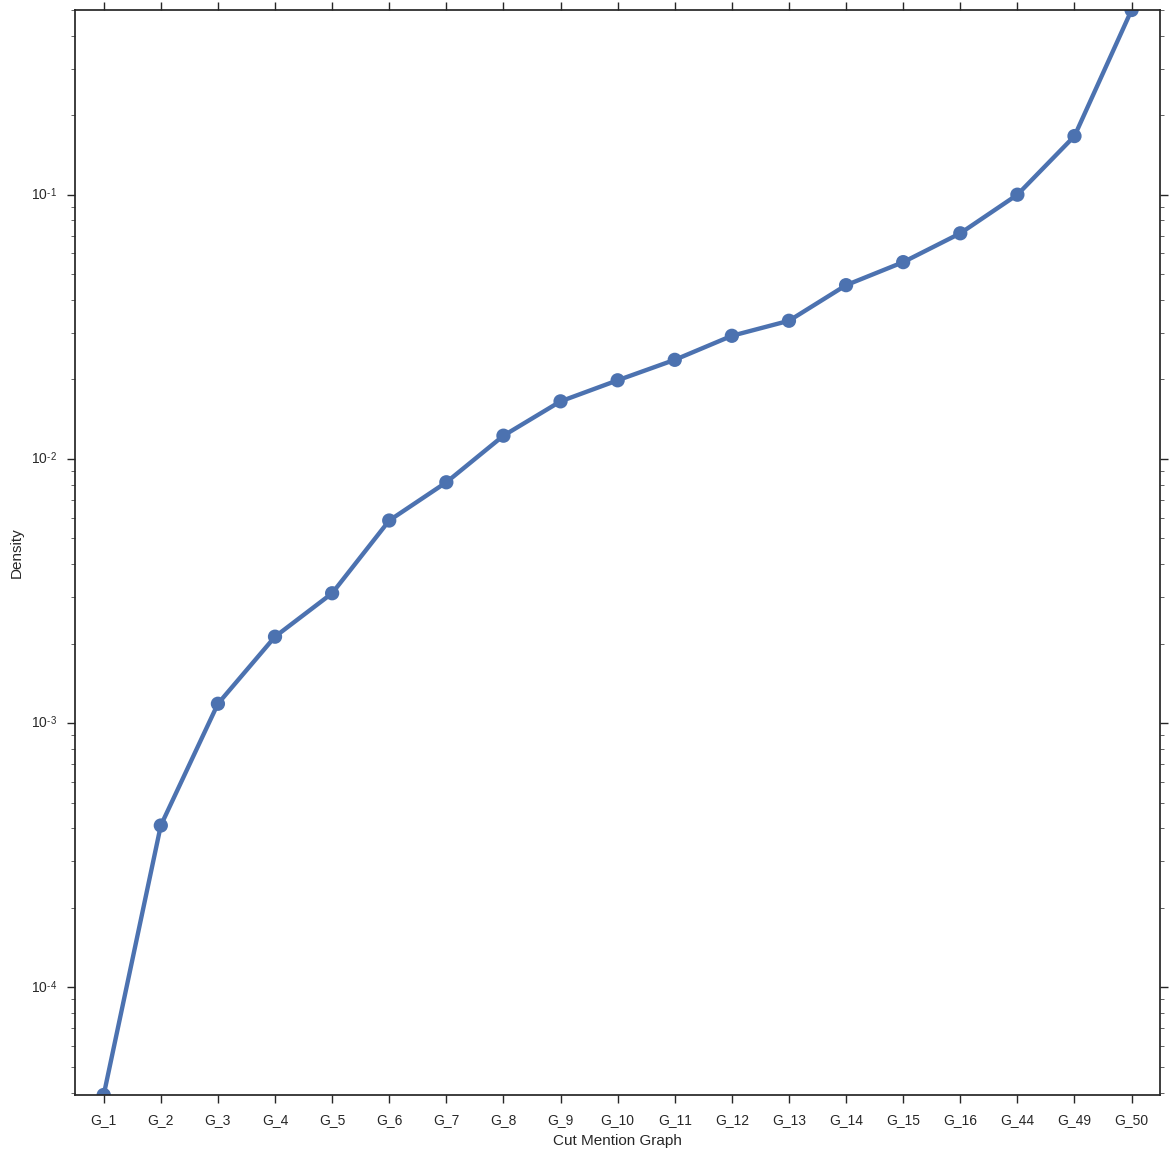

In [48]:
x = cdf["Cut Mentions Graph"]
y = cdf["Density"]
plt.figure(figsize=(14,14))

ax=sns.pointplot(x, y)
ax.set(yscale="log")
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Density')

a3=ax.set(ylim=(0,max(lsd)))



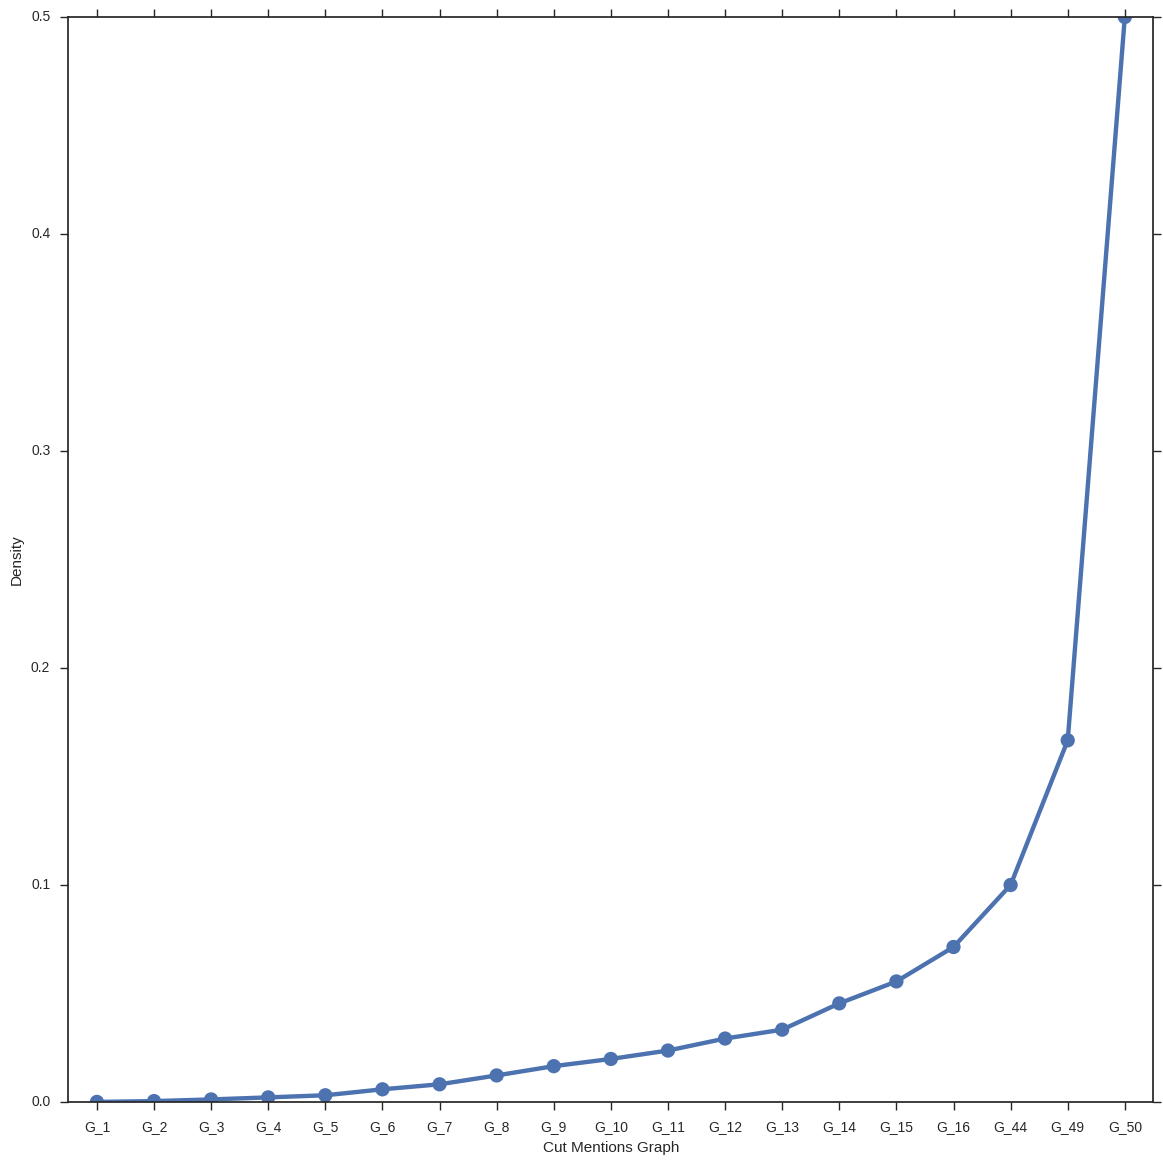

In [47]:
x = cdf["Cut Mentions Graph"]
y = cdf["Density"]
plt.figure(figsize=(14,14))


ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Mentions Graph', ylabel='Density')
a3=ax.set(ylim=(0,max(lsd)))



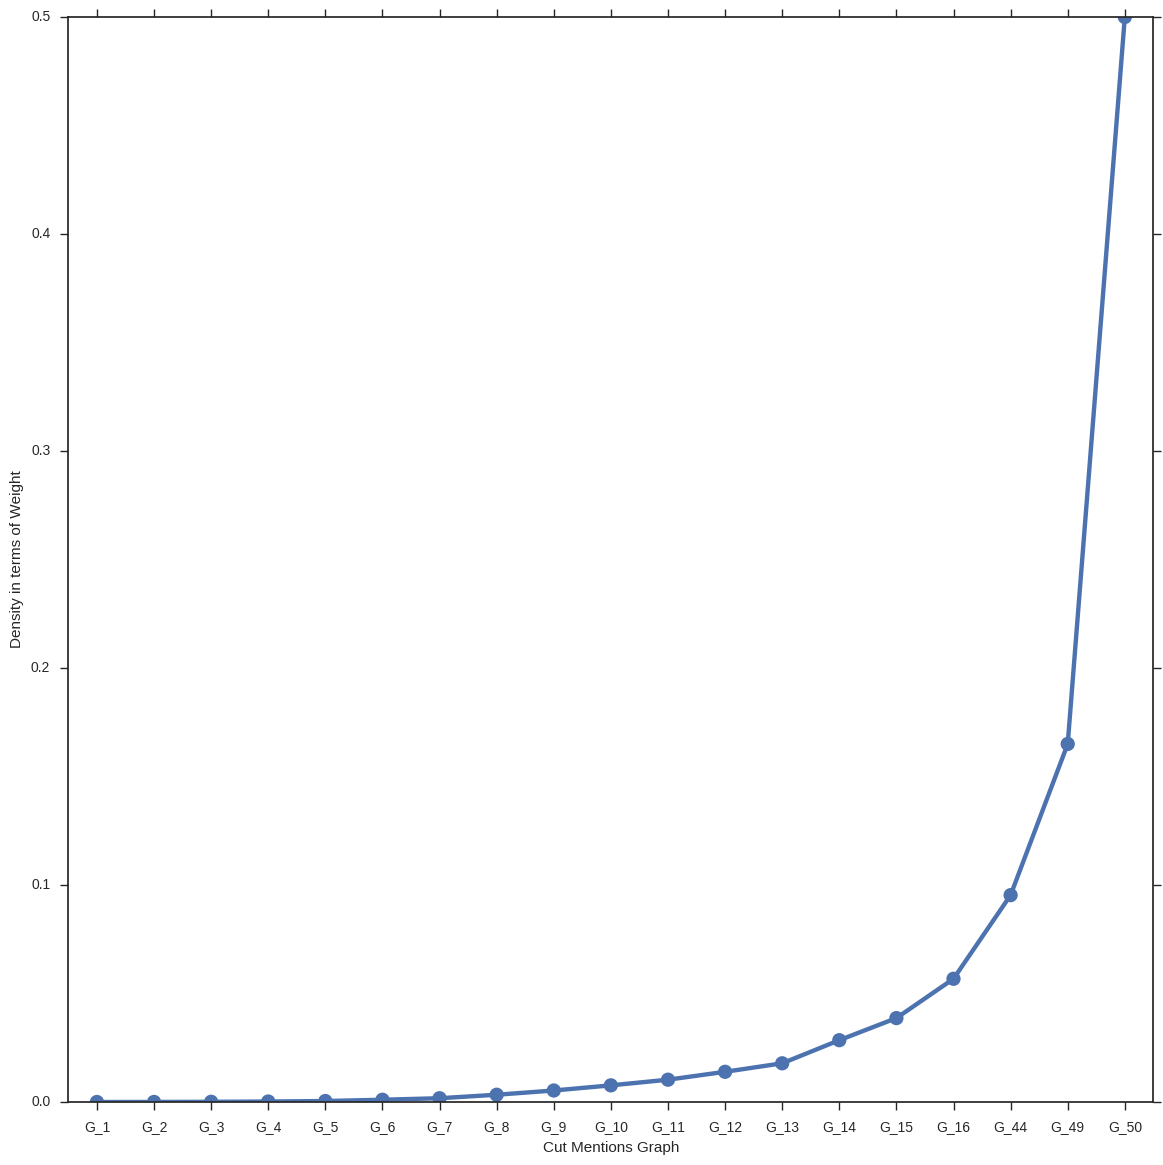

In [50]:
x = cdf["Cut Mentions Graph"]
y = cdf["Density in terms of Weight"]
plt.figure(figsize=(14,14))


ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Mentions Graph', ylabel='Density in terms of Weight')
a3=ax.set(ylim=(0,max(lwden)))



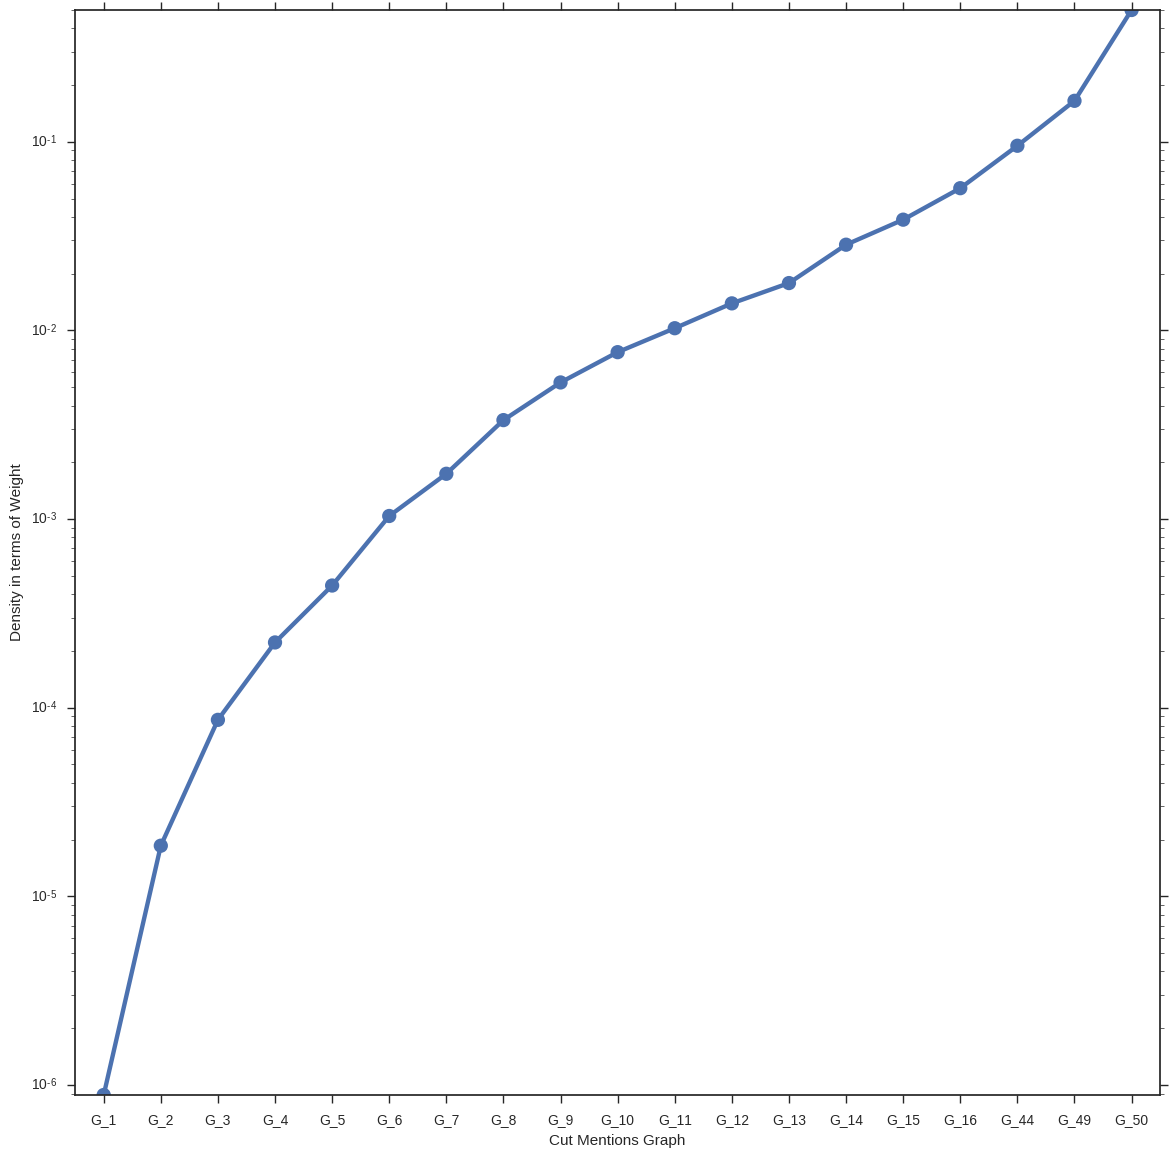

In [51]:
x = cdf["Cut Mentions Graph"]
y = cdf["Density in terms of Weight"]
plt.figure(figsize=(14,14))


ax=sns.pointplot(x, y)
ax.set(yscale='log')
a1=ax.set(xlabel='Cut Mentions Graph', ylabel='Density in terms of Weight')
a3=ax.set(ylim=(0,max(lwden)))



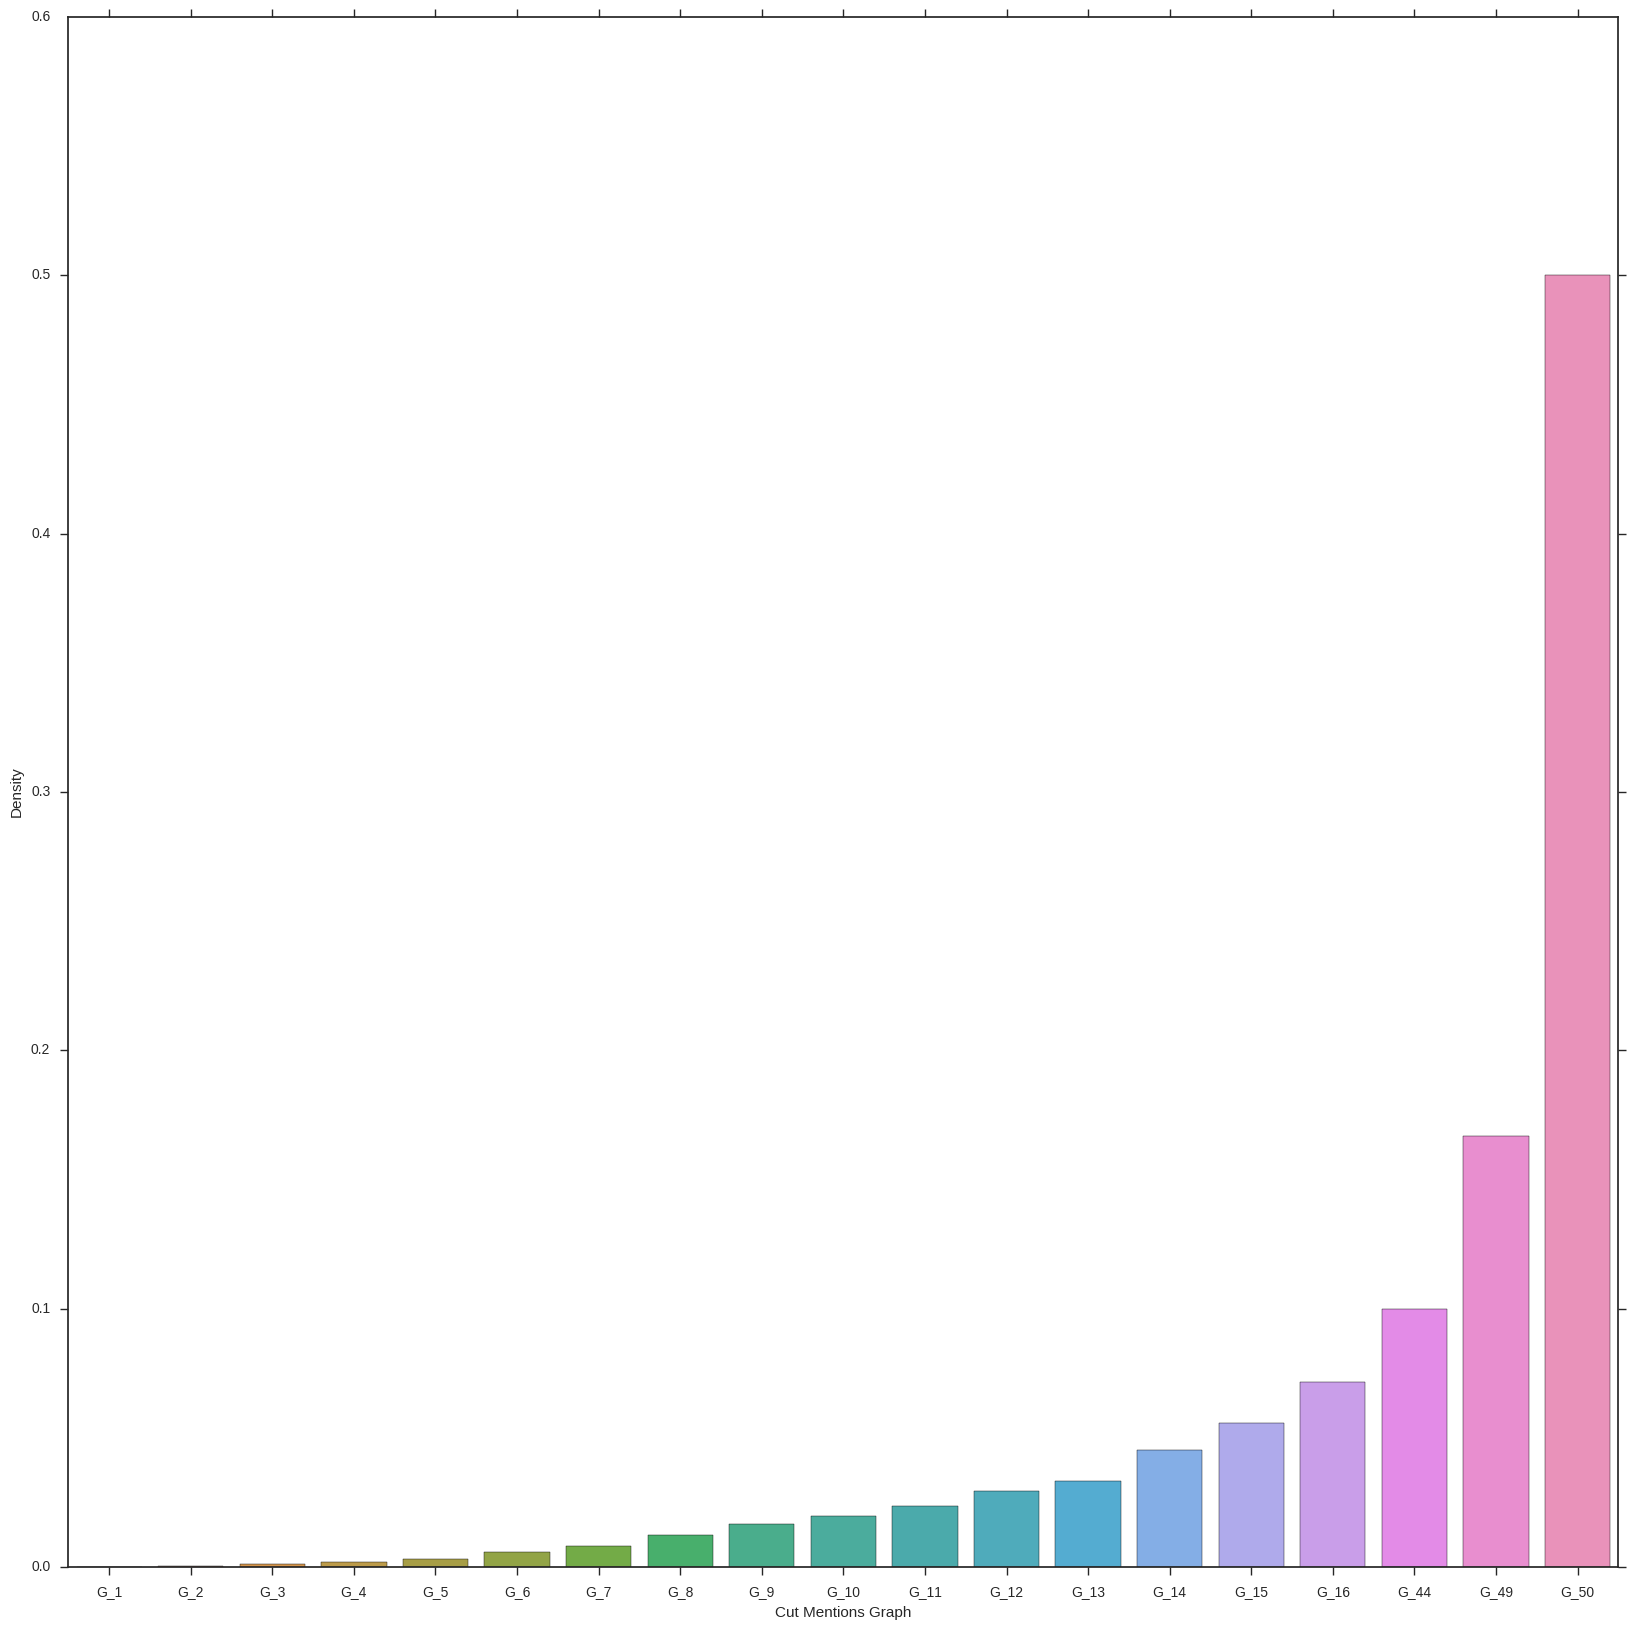

In [52]:
x = cdf["Cut Mentions Graph"]
y = cdf["Density"]
plt.figure(figsize=(20,20))

ax=sns.barplot(x, y)
a1=ax.set(xlabel='Cut Mentions Graph', ylabel='Density')

a3=ax.set(ylim=(0,max(lsd)+0.10))


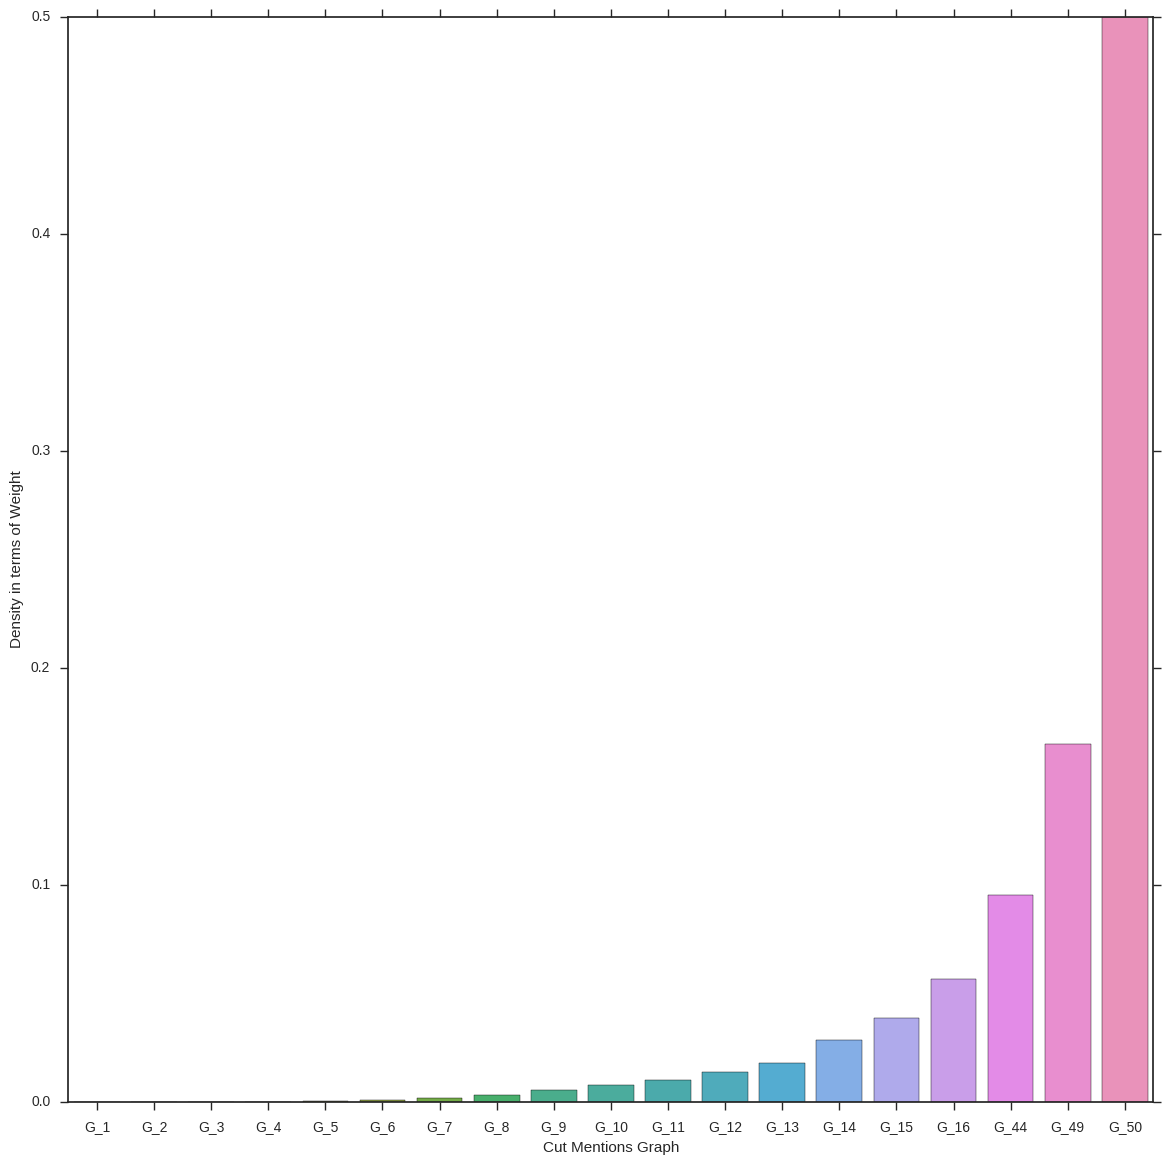

In [53]:
x = cdf["Cut Mentions Graph"]
y = cdf["Density in terms of Weight"]
plt.figure(figsize=(14,14))


ax=sns.barplot(x, y)

a1=ax.set(xlabel='Cut Mentions Graph', ylabel='Density in terms of Weight')
a3=ax.set(ylim=(0,max(lwden)))



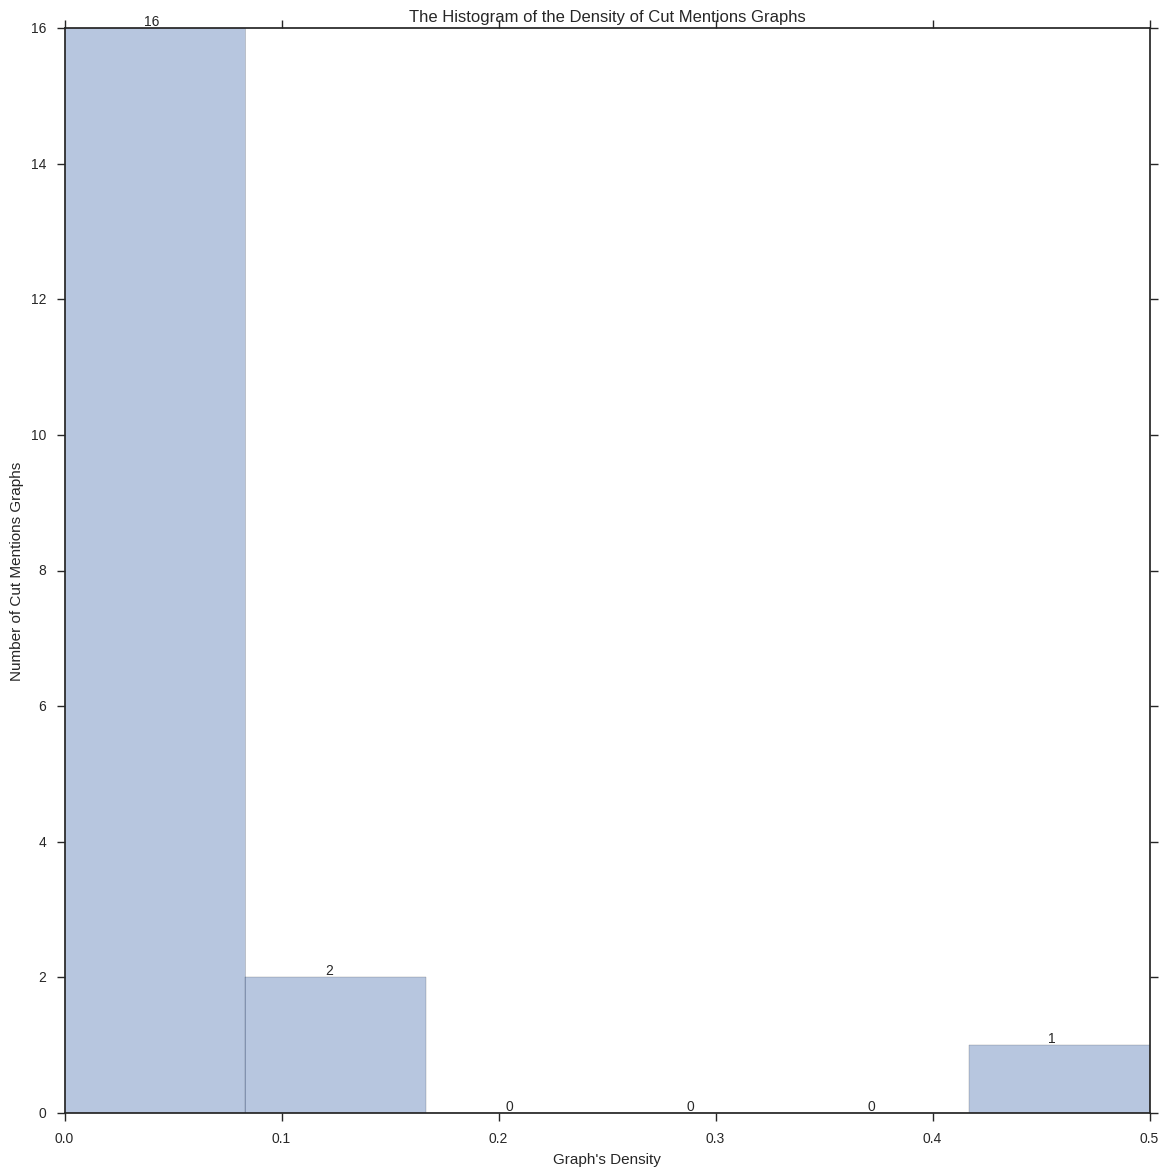

In [54]:
plt.figure(figsize=(14,14))
bins=6
ax=sns.distplot(cdf['Density'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Mentions Graphs')
plt.xlabel('Graph\'s Density')
tt='The Histogram of the Density of Cut Mentions Graphs' 
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lsd)/float(bins))/2-0.005)), height+0.05, '%i'%(height))#/total))
plt.title(tt)

warnings.filterwarnings("ignore")

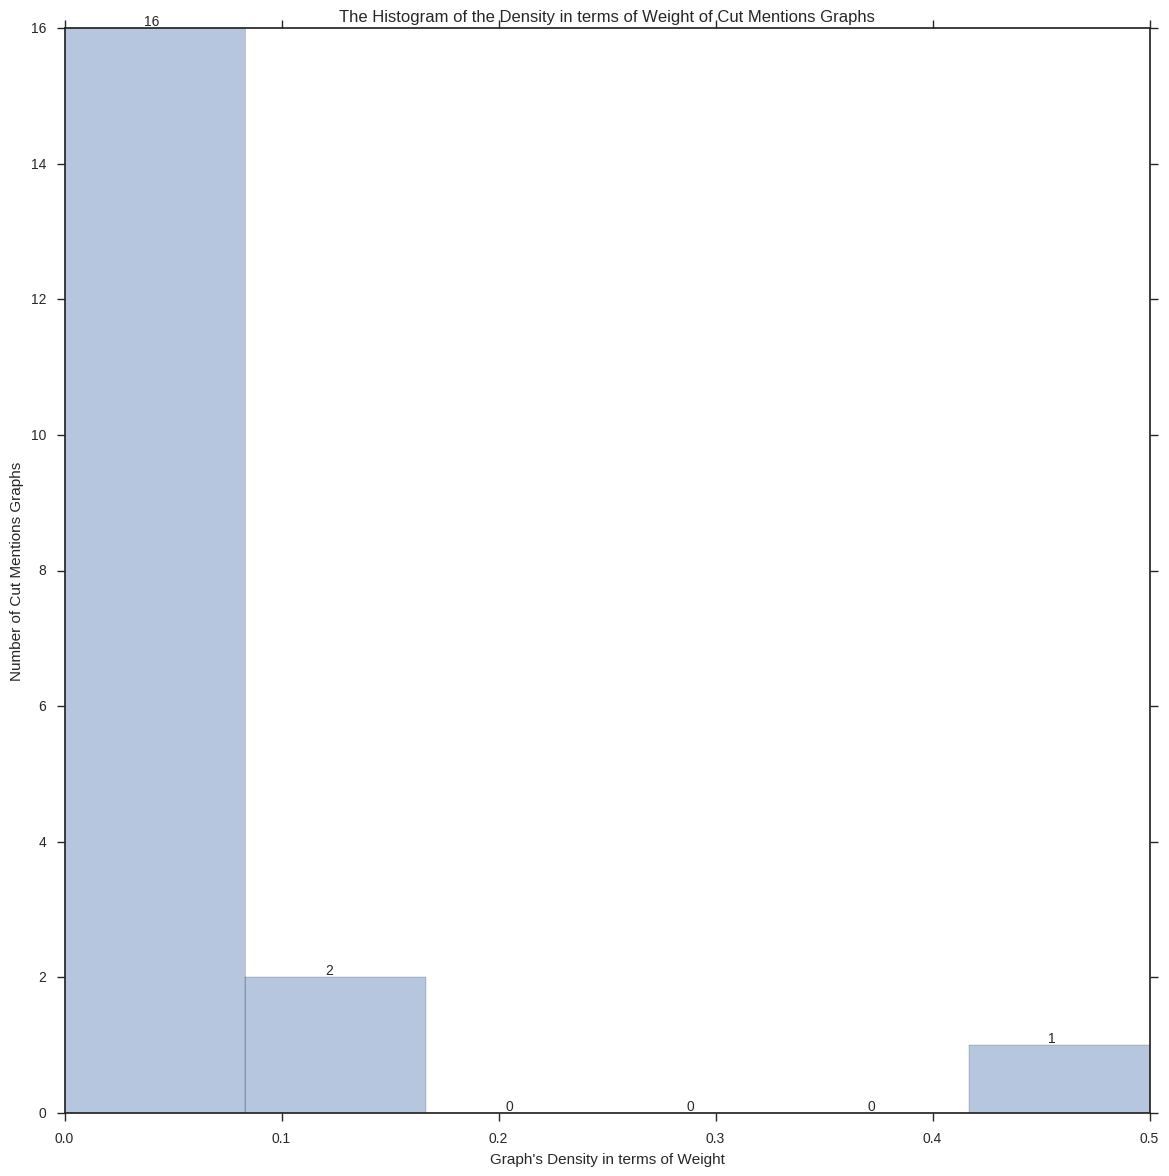

In [56]:
plt.figure(figsize=(14,14))
bins=6
ax=sns.distplot(cdf['Density in terms of Weight'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Mentions Graphs')
plt.xlabel('Graph\'s Density in terms of Weight')
tt='The Histogram of the Density in terms of Weight of Cut Mentions Graphs' 
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lwden)/float(bins))/2-0.005)), height+0.05, '%i'%(height))#/total))
plt.title(tt)

warnings.filterwarnings("ignore")